# CAB420, Classification, Additional Example: Classifier Parameters and Decision Boundaries
Dr Simon Denman (s.denman@qut.edu.au)

## Overview
This example illustrates the impact of classifier parameters on the learned decision bounaries of our three classifiers:
* Support Vector Machines
* K-Nearest Neighbours Classifier
* Random Forest

This example is not a detailed run through of these algorithms, and supports the other examples from this week. Think of this really as a supplementary example with lots of pictures. It mainly exists to generate plots and figures for use in the slides.

In [1]:
import numpy
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### An Oddity

This example is going to use hard-margin SVMs, where $C=\infty$, however it seems that a recent update to sklearn means that it won't actually accept a value of $C=\infty$. As such, we're instead going to create a very large value to stand in place of $\infty$.

In [2]:
inf = 1e250

## The Data

We're going to create three simple random datasets here to explore things. These will be as follows:
* Dataset I: Two random clusters, that are linearly separable
* Dataset II: Two random clusters, with some overlap, i.e. not linearly separable
* Dataset III: Two random clusters, one totally enclosing the other (though with a gap between). Also not linearly separable, although the points do not overlap

Text(0.5, 1.0, 'Dataset 3')

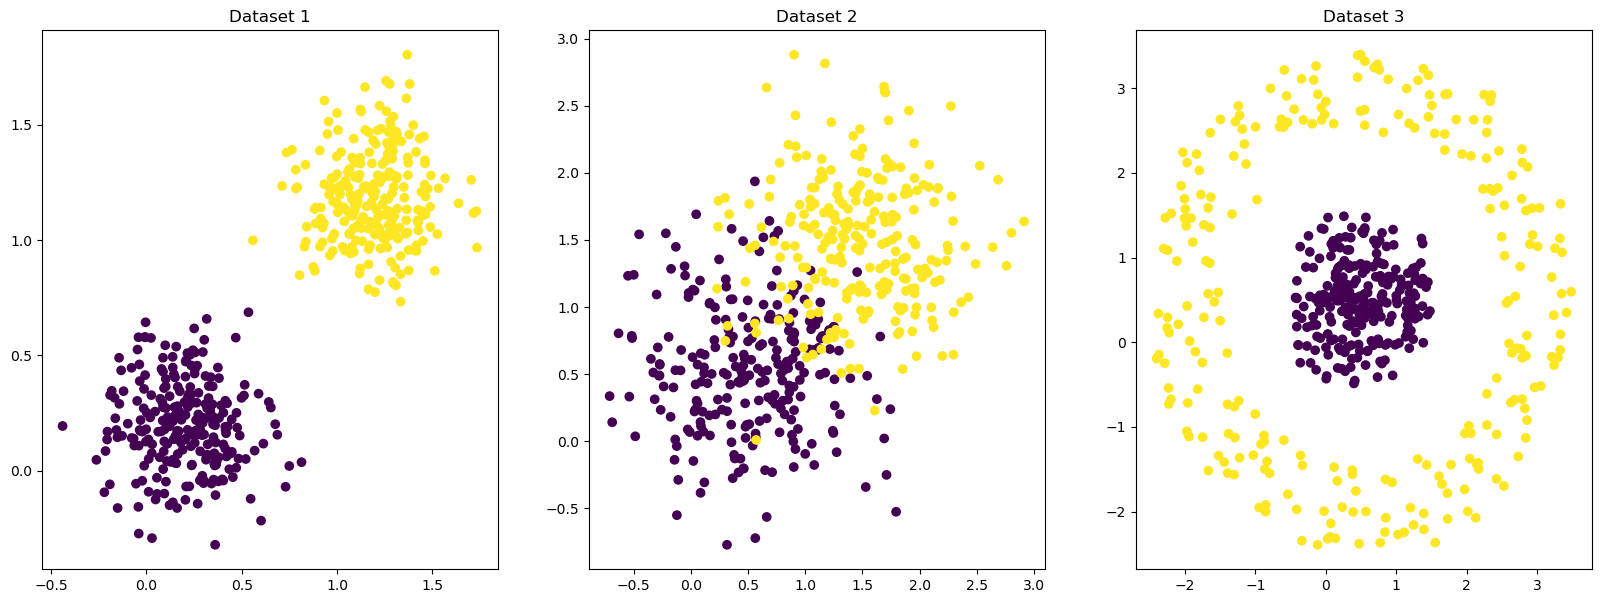

In [3]:
c1 = numpy.random.normal(0.2, 0.2, (250, 2))
c2 = numpy.random.normal(0.2, 0.2, (250, 2))
c2[:,0] = c2[:,0]+1
c2[:,1] = c2[:,1]+1

X_1 = numpy.concatenate([c1, c2])
Y_1 = numpy.zeros((500))
Y_1[250:] = 1

c1 = numpy.random.normal(0.5, 0.5, (250, 2))
c2 = numpy.random.normal(0.5, 0.5, (250, 2))
c2[:,0] = c2[:,0]+1
c2[:,1] = c2[:,1]+1

X_2 = numpy.concatenate([c1, c2])
Y_2 = numpy.zeros((500))
Y_2[250:] = 1

theta = numpy.arange(0, math.pi*2, math.pi*2/250)
theta = numpy.array([numpy.cos(theta), numpy.sin(theta)]).transpose()
c1 = 0.5*theta + numpy.random.random((250,2))
c2 = 2.5*theta + numpy.random.random((250,2))

X_3 = numpy.concatenate([c1, c2])
Y_3 = numpy.zeros((500))
Y_3[250:] = 1

fig = plt.figure(figsize=[20, 7])
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X_1[:,0], X_1[:,1], c=Y_1);
ax.set_title('Dataset 1')
ax = fig.add_subplot(1, 3, 2)
ax.scatter(X_2[:,0], X_2[:,1], c=Y_2);
ax.set_title('Dataset 2')
ax = fig.add_subplot(1, 3, 3)
ax.scatter(X_3[:,0], X_3[:,1], c=Y_3);
ax.set_title('Dataset 3')

We'll create a simple function to plot our decision boundary. This has been adapted from [this](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py) example.

In [4]:
def plot_decision_boundary(classifier, ax, X, Y, title='', padding = 0.5):
    mins = numpy.min(X, 0) - padding
    maxs = numpy.max(X, 0) + padding
    xx, yy = numpy.meshgrid(numpy.arange(mins[0], maxs[0], 0.025),
                         numpy.arange(mins[1], maxs[1], 0.025))

    Z = classifier.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
    ax.set_title(title)

## Support Vector Machines (SVMs)

SVMs have two main parameters:
* C, which has an inverse relationship with the strength of regularisation. $C=\infty$ means that we have no regularisation, and a hard margin classifier. If data is not linearly separable and $C=\infty$, our SVM fitting will fail
* The kernel, which we can use to project our data into a higher dimensional space in the hope that it will be easier to find a boundary between the classes

To start with, we'll keep our kernal as 'linear', which means the data is not projected to a higher dimensional space, and just vary C.

**Remember:** We're not actually using $\infty$ here as sklearn will produce an error if we try, we're using a very large value instead.

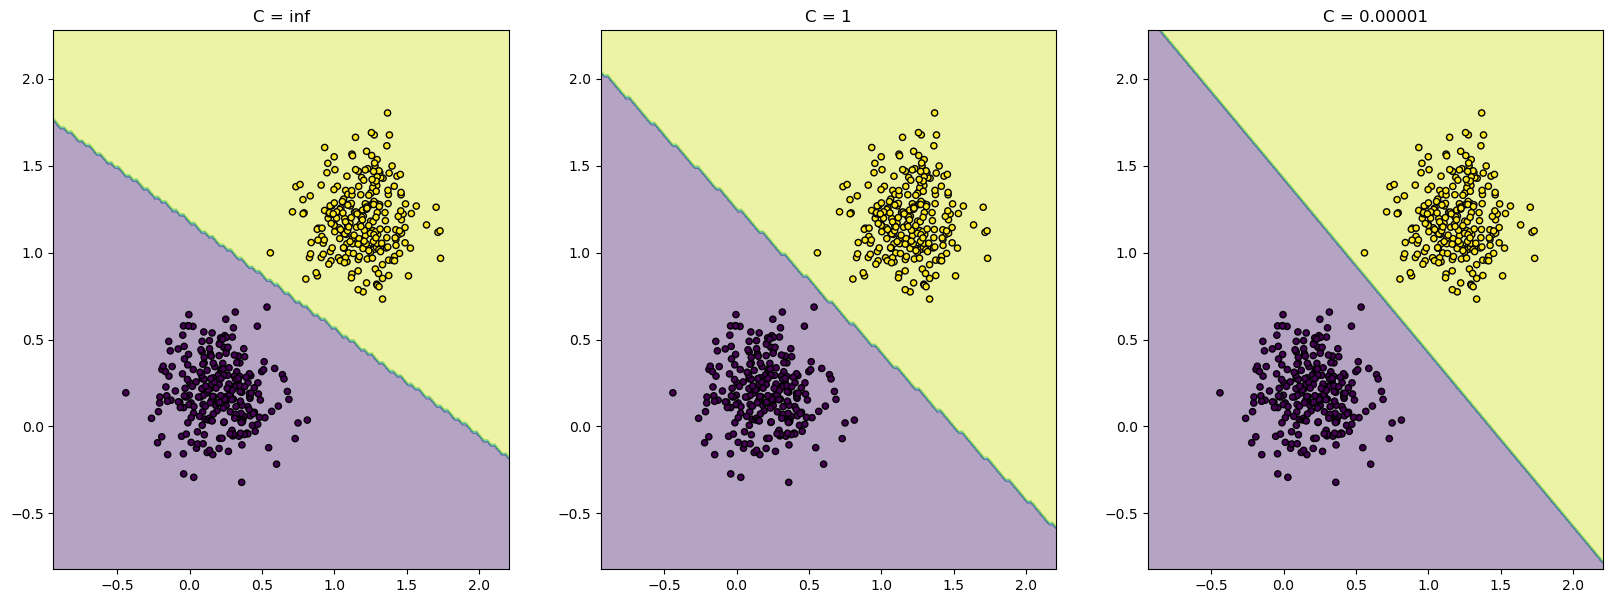

In [5]:
fig = plt.figure(figsize=[20, 7])

svm = SVC(C=inf, kernel='linear')
svm.fit(X_1, Y_1)
ax = fig.add_subplot(1, 3, 1)
plot_decision_boundary(svm, ax, X_1, Y_1, 'C = inf')

svm = SVC(C=1, kernel='linear')
svm.fit(X_1, Y_1)
ax = fig.add_subplot(1, 3, 2)
plot_decision_boundary(svm, ax, X_1, Y_1, 'C = 1')

svm = SVC(C=0.00001, kernel='linear')
svm.fit(X_1, Y_1)
ax = fig.add_subplot(1, 3, 3)
plot_decision_boundary(svm, ax, X_1, Y_1, 'C = 0.00001')

The first case is not too exciting. Our data is linearly separable, and our SVMs find a boundary that gets things pretty right. We do see that for $C=\infty$ our line (hyperplane) goes straight through the middle of the data, while for the other two it goes somewhere close to the middle. Depending on what random seed you start with, you may also see that for the soft margin cases, one or two points are mis-classified. This is normal, and expected.

Our second case uses data that is not linearly separable. This means that we expect $C=\infty$ to fail. Hence, we have added a maximum number of iterations to stop our model fitting when it's not working.

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


1
0
0


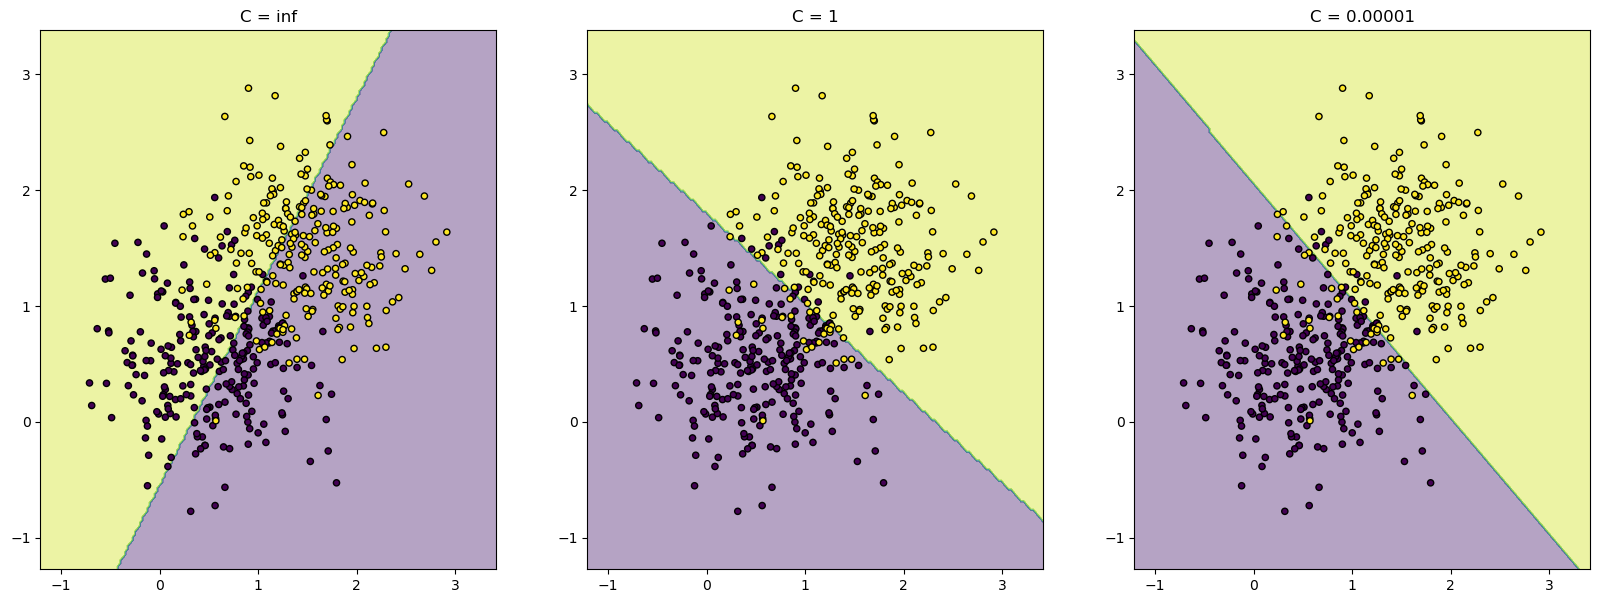

In [6]:
fig = plt.figure(figsize=[20, 7])

svm = SVC(C=inf, kernel='linear', max_iter=1000000)
svm.fit(X_2, Y_2)
print(svm.fit_status_)
ax = fig.add_subplot(1, 3, 1)
plot_decision_boundary(svm, ax, X_2, Y_2, 'C = inf')

svm = SVC(C=1, kernel='linear', max_iter=1000000)
svm.fit(X_2, Y_2)
print(svm.fit_status_)
ax = fig.add_subplot(1, 3, 2)
plot_decision_boundary(svm, ax, X_2, Y_2, 'C = 1')

svm = SVC(C=0.00001, kernel='linear', max_iter=1000000)
svm.fit(X_2, Y_2)
print(svm.fit_status_)
ax = fig.add_subplot(1, 3, 3)
plot_decision_boundary(svm, ax, X_2, Y_2, 'C = 0.00001')

For our second case, we see that $C=\infty$ fails, which was expected. This is the cause of the warning, and we can also see from the value of svm.fit_status_ that this has failed (0 indicates success, 1 indicates failure). Our two soft margin cases both work, and both achieve a similar fit, with the line going roughly down the middle of the data.

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


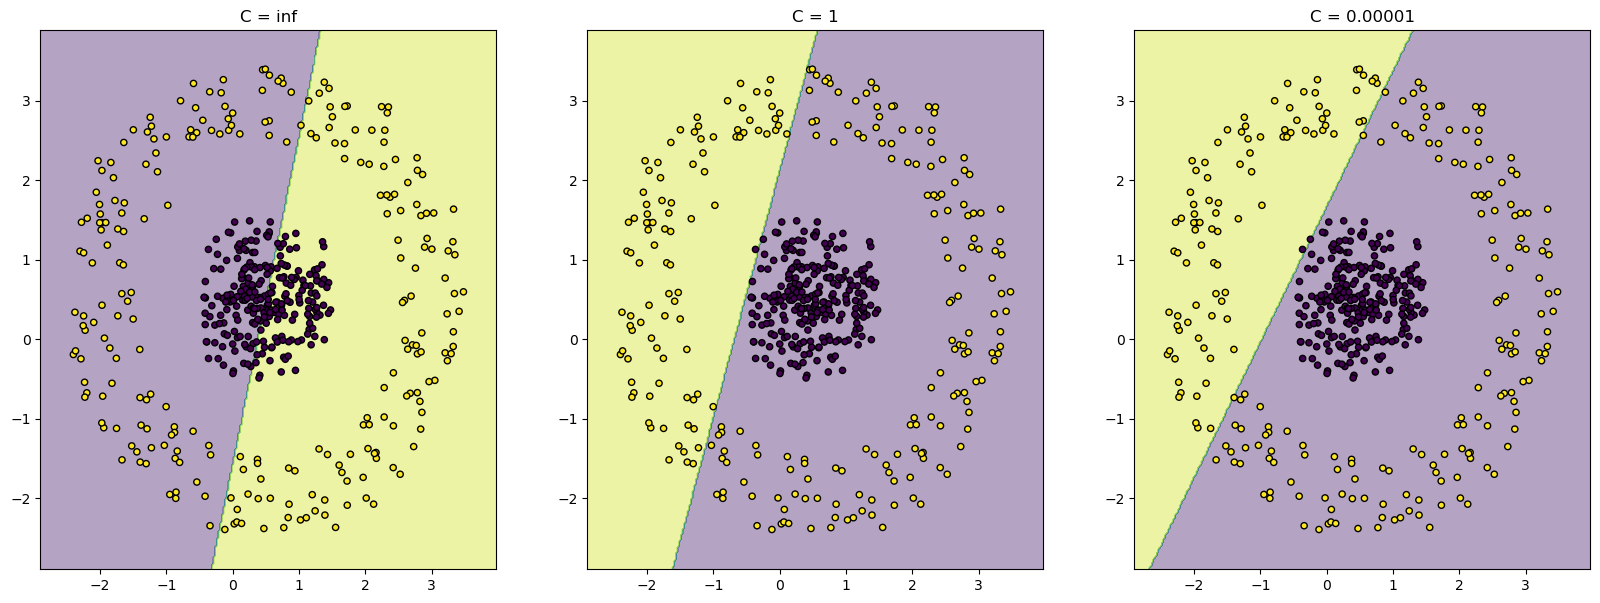

In [7]:
fig = plt.figure(figsize=[20, 7])

svm = SVC(C=inf, kernel='linear', max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(1, 3, 1)
plot_decision_boundary(svm, ax, X_3, Y_3, 'C = inf')

svm = SVC(C=1, kernel='linear', max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(1, 3, 2)
plot_decision_boundary(svm, ax, X_3, Y_3, 'C = 1')

svm = SVC(C=0.00001, kernel='linear', max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(1, 3, 3)
plot_decision_boundary(svm, ax, X_3, Y_3, 'C = 0.00001')

The third case results in similar performance to the second. Our hard margin classifier ($C=\infty$) fails to fit, while the others both do - however it's fair to say that the fit is not great. Ultimatley, it's very hard to find a straight line that can divide this data particularly well.

With that in mind, let's play with some kernels. We'll start with the RBF kernel and:
* explore what happens with the default kernel parameters as C varies
* fix C and chance the value of gamma in the kernel

For exploring the kernels, we'll use just the second and third datasets as a linear kernel is sufficient for the first dataset.

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


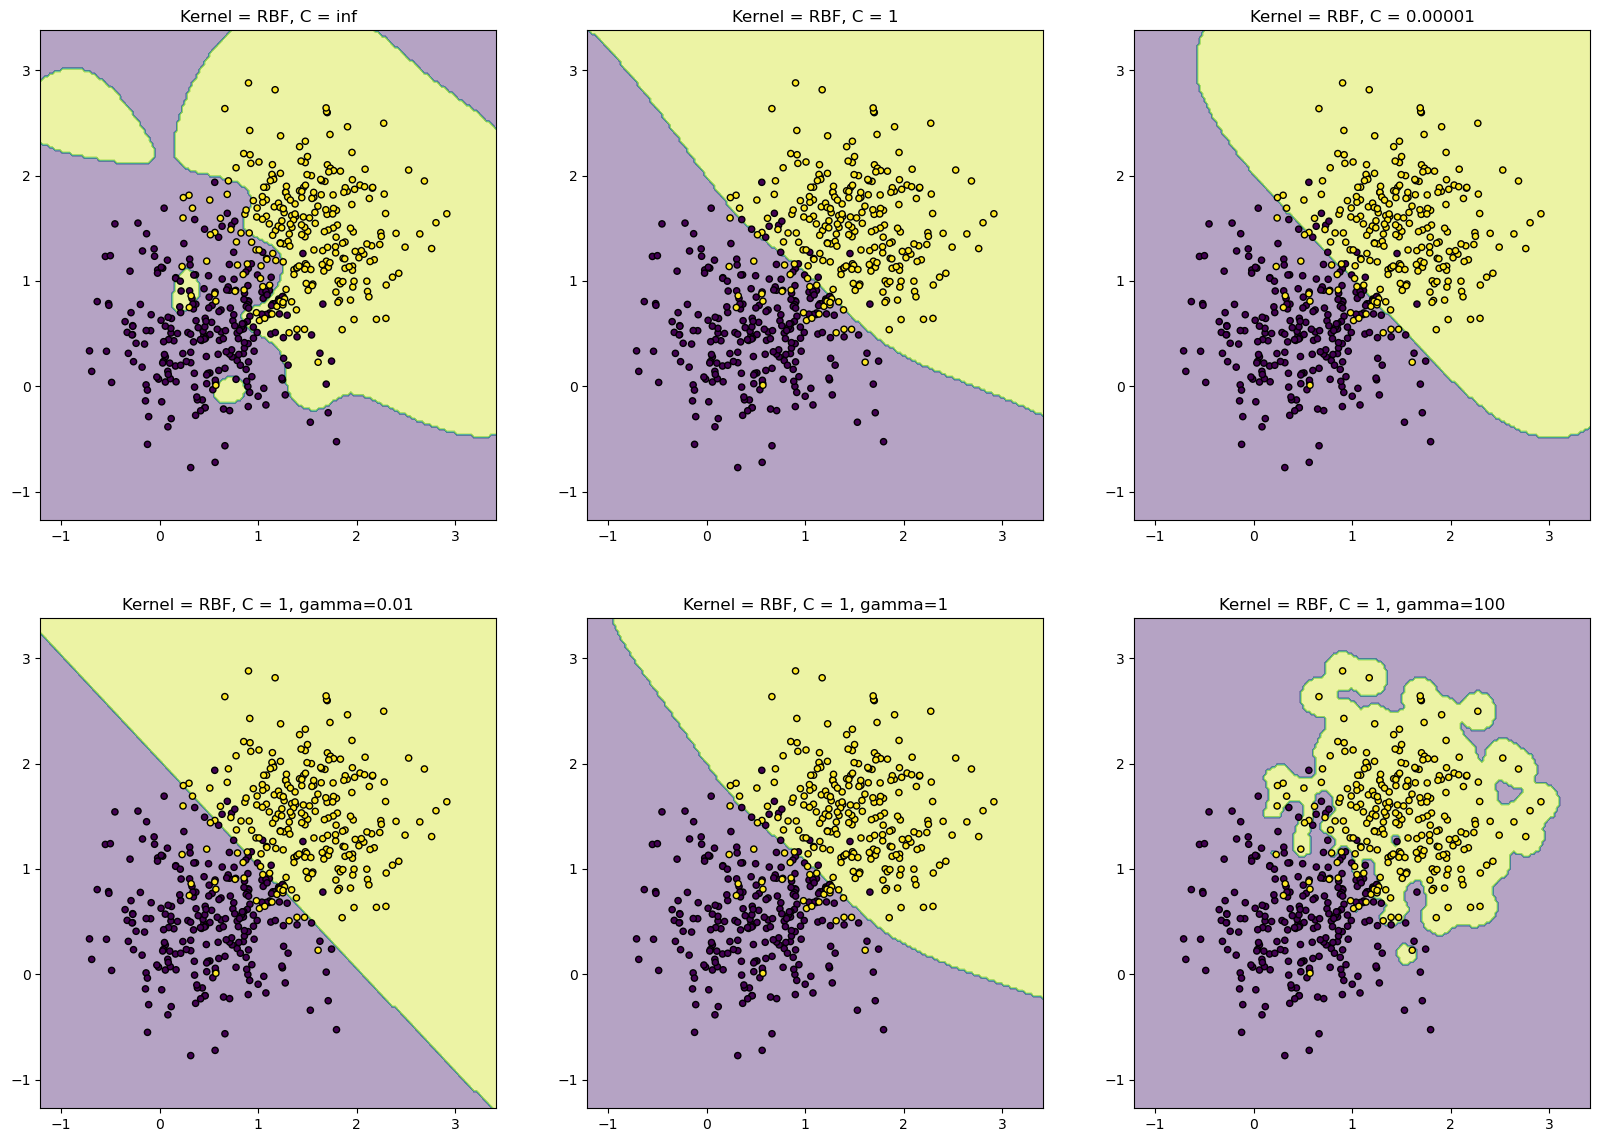

In [8]:
fig = plt.figure(figsize=[20, 14])

svm = SVC(C=inf, kernel='rbf', max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 1)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = RBF, C = inf')

svm = SVC(C=1, kernel='rbf', max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 2)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = RBF, C = 1')

svm = SVC(C=0.00001, kernel='rbf', max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 3)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = RBF, C = 0.00001')

svm = SVC(C=1, kernel='rbf', gamma=0.01, max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 4)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = RBF, C = 1, gamma=0.01')

svm = SVC(C=1, kernel='rbf', gamma=1, max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 5)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = RBF, C = 1, gamma=1')

svm = SVC(C=1, kernel='rbf', gamma=100, max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 6)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = RBF, C = 1, gamma=100')

Varying C, we see similar things to what was observed with a linear kernel. For $C=\infty$, we fail to converge (and get a very interesting shape), and for smaller C's we find a boundary that provides reasonable separation.

Fixing C and varying gamma, we see that with small gamma's we get a very smooth boundary, and as gamma get's bigger we get more complex shapes, and more danger of overfitting.

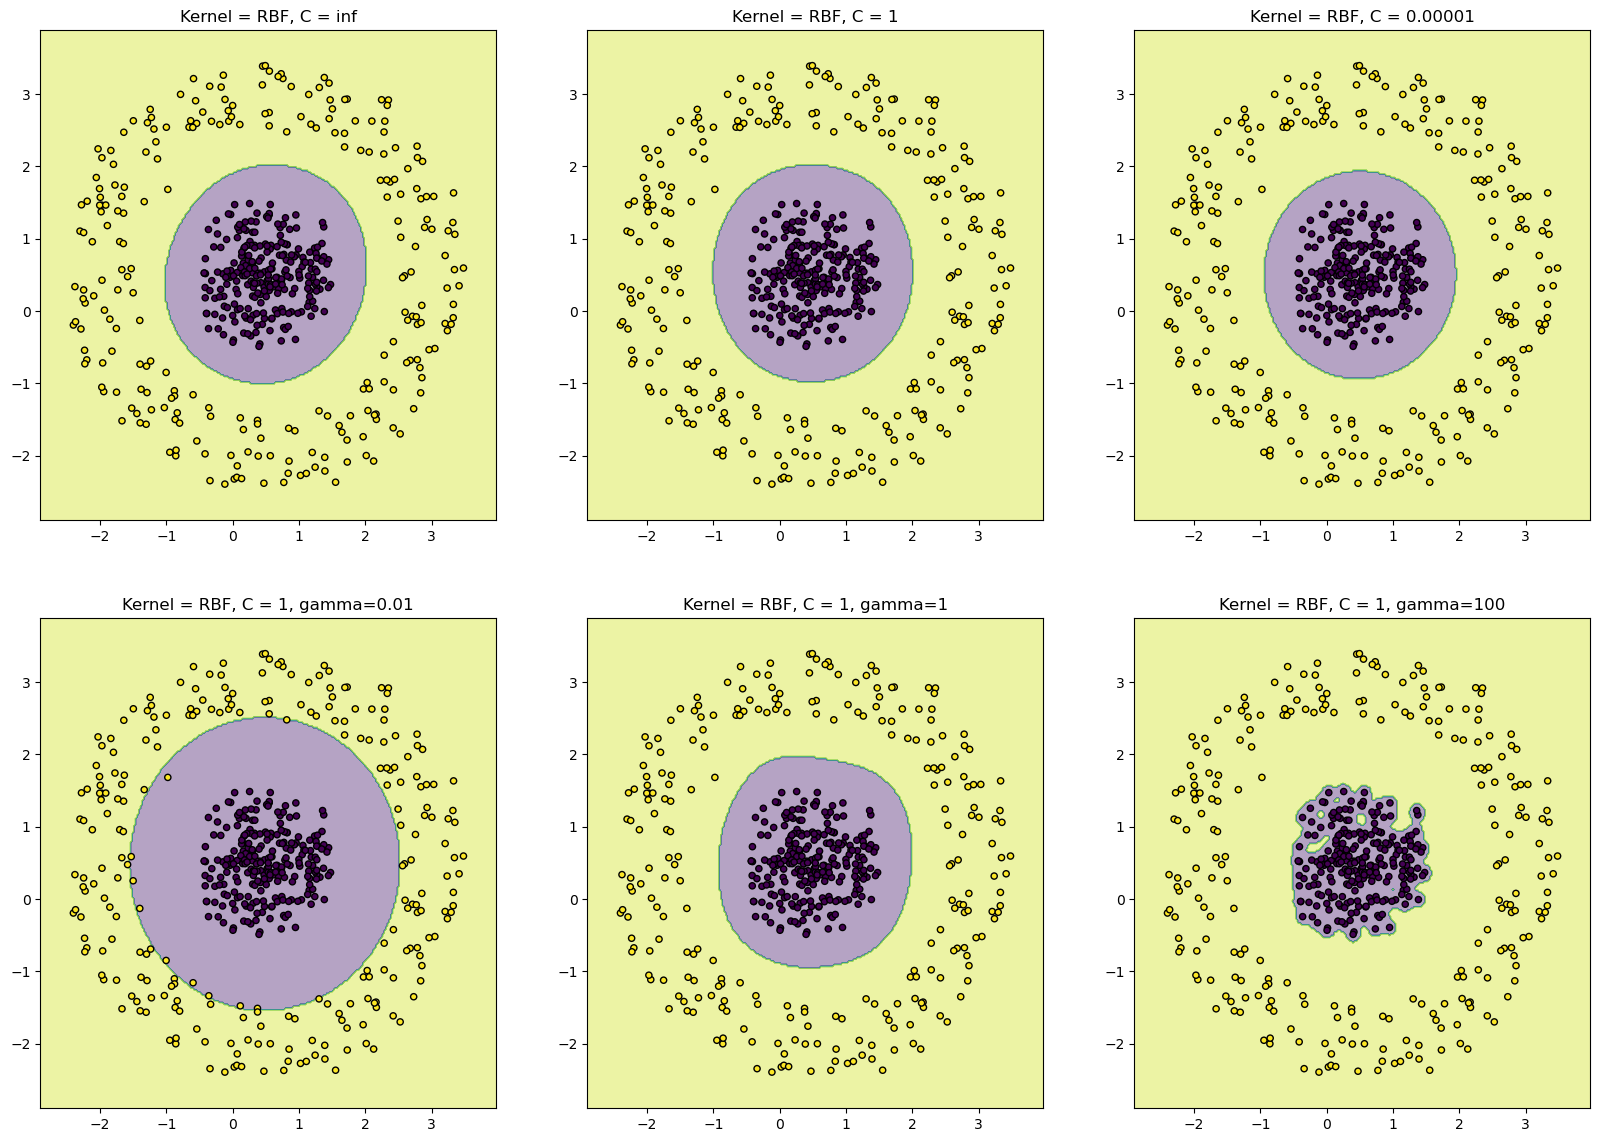

In [9]:
fig = plt.figure(figsize=[20, 14])

svm = SVC(C=inf, kernel='rbf', max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 1)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = RBF, C = inf')

svm = SVC(C=1, kernel='rbf', max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 2)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = RBF, C = 1')

svm = SVC(C=0.00001, kernel='rbf', max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 3)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = RBF, C = 0.00001')

svm = SVC(C=1, kernel='rbf', gamma=0.01, max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 4)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = RBF, C = 1, gamma=0.01')

svm = SVC(C=1, kernel='rbf', gamma=1, max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 5)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = RBF, C = 1, gamma=1')

svm = SVC(C=1, kernel='rbf', gamma=100, max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 6)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = RBF, C = 1, gamma=100')

On the third dataset we see similar things, though in this case our hard margin SVM finds a solution, as there is a clear separation between the classes (just not in the linear space).

On to the polynomial kernel now, we'll do a simlar thing and first vary C (with a fixed polynomial degree), and then vary the degree with a fixed C.

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


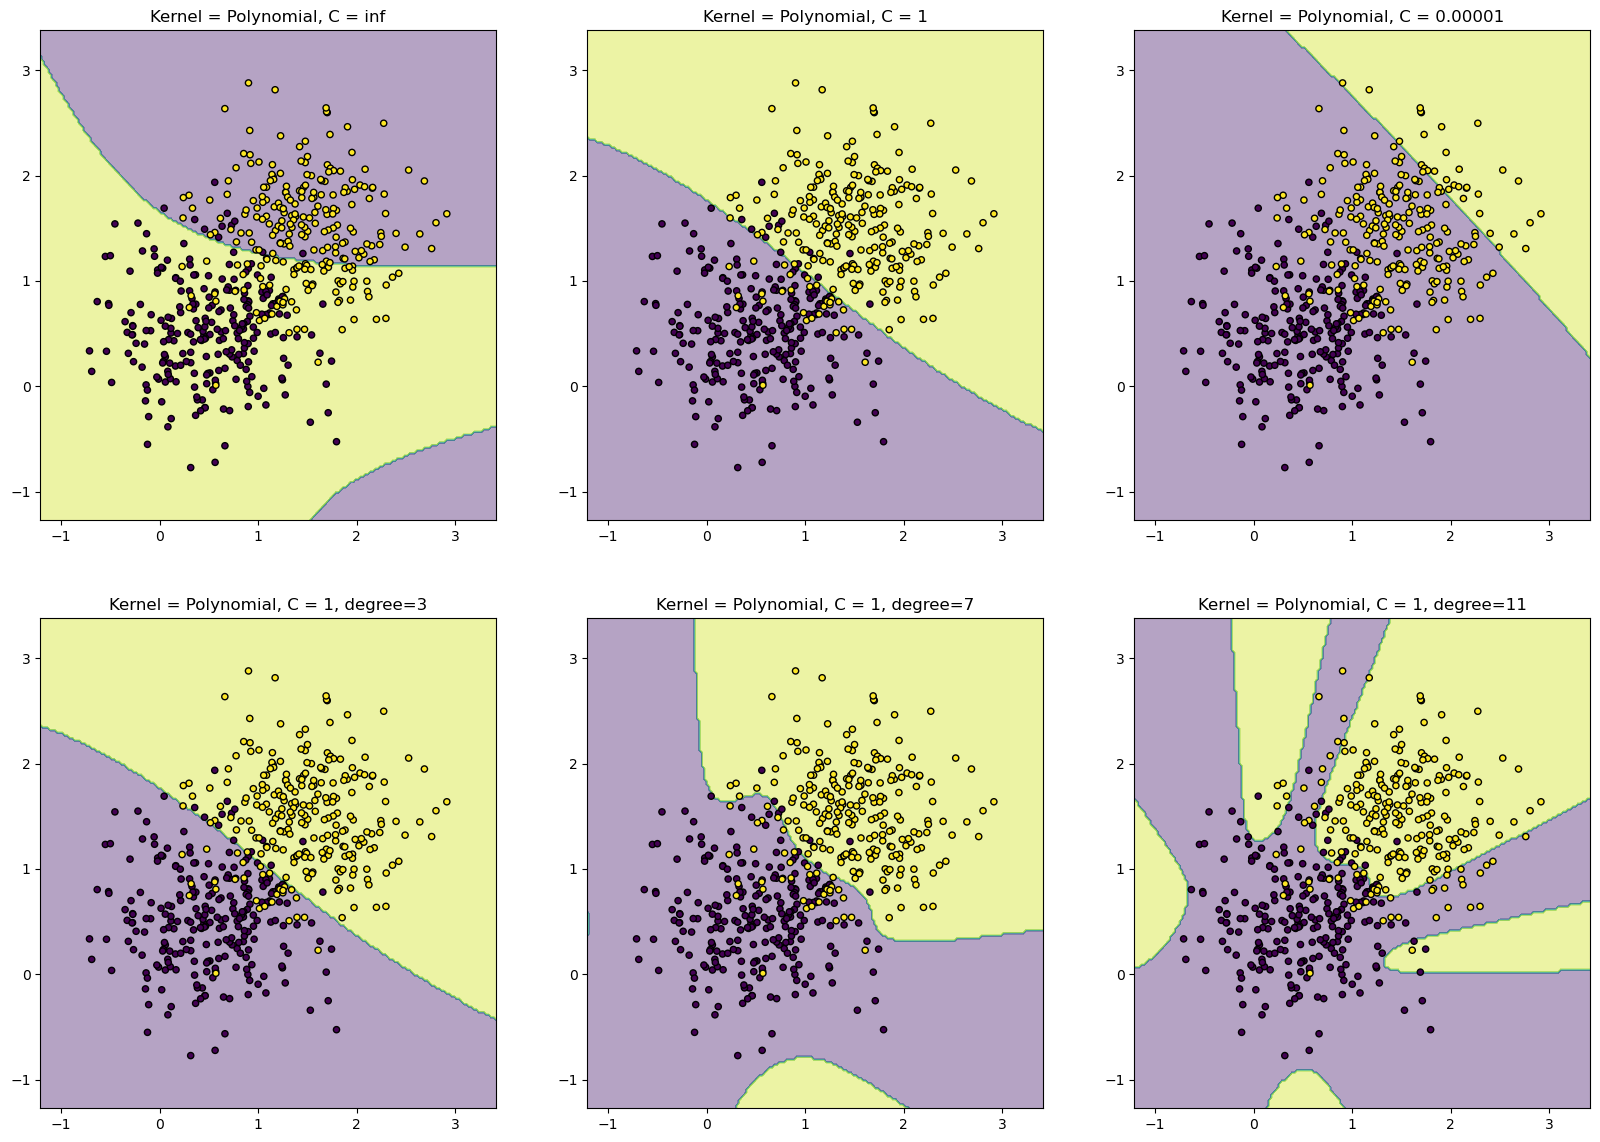

In [10]:
fig = plt.figure(figsize=[20, 14])

svm = SVC(C=inf, kernel='poly', max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 1)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = inf')

svm = SVC(C=1, kernel='poly', max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 2)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = 1')

svm = SVC(C=0.00001, kernel='poly', max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 3)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = 0.00001')

svm = SVC(C=1, kernel='poly', degree=3, max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 4)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = 1, degree=3')

svm = SVC(C=1, kernel='poly', degree=7, max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 5)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = 1, degree=7')

svm = SVC(C=1, kernel='poly', degree=11, max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 6)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = 1, degree=11')

These look very different to our RBF plots, and we get more of an idea if we increase the area around our plots to see the shape of the decision boundary. We can see that we've still learnt a line, but now that line is defined by a polynomial. As we increase the degree (or order) of the polynomial, our line can get more complex, with more changes in direction, etc (if you think back to high school maths, with a quadratic curve you have one minimum or maximum, with a cubic you have 2, with a quartic you have 3, etc; hence higher degree polynomials have more complex shapes). 

We can see that a number of our SVMs do a fair job of separating the data, but it's also (hopefully) easy to see how overfitting could be possible, or how trying to extrapolate with such a model could be a problem.

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


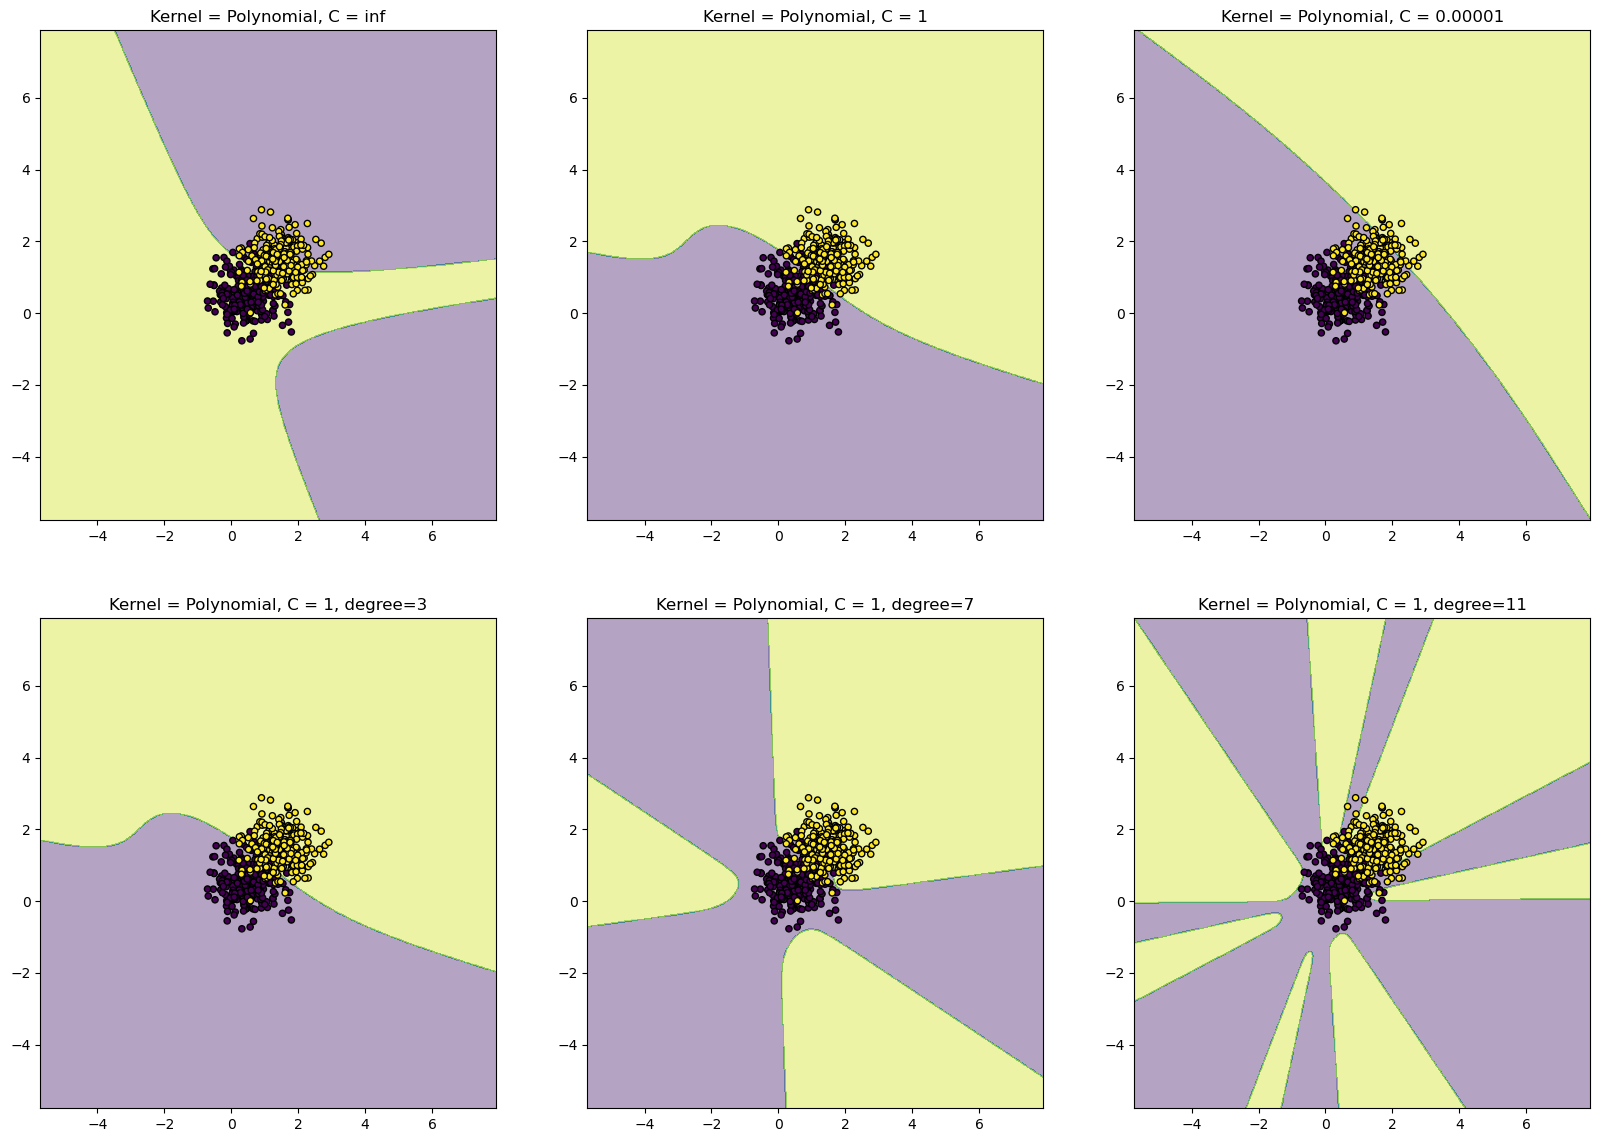

In [11]:
fig = plt.figure(figsize=[20, 14])

svm = SVC(C=inf, kernel='poly', max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 1)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = inf', padding=5)

svm = SVC(C=1, kernel='poly', max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 2)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = 1', padding=5)

svm = SVC(C=0.00001, kernel='poly', max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 3)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = 0.00001', padding=5)

svm = SVC(C=1, kernel='poly', degree=3, max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 4)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = 1, degree=3', padding=5)

svm = SVC(C=1, kernel='poly', degree=7, max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 5)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = 1, degree=7', padding=5)

svm = SVC(C=1, kernel='poly', degree=11, max_iter=1000000)
svm.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 6)
plot_decision_boundary(svm, ax, X_2, Y_2, 'Kernel = Polynomial, C = 1, degree=11', padding=5)

Let's repeat this for our third set of data, keeping the large padding to visualise the learnt boundary better.

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


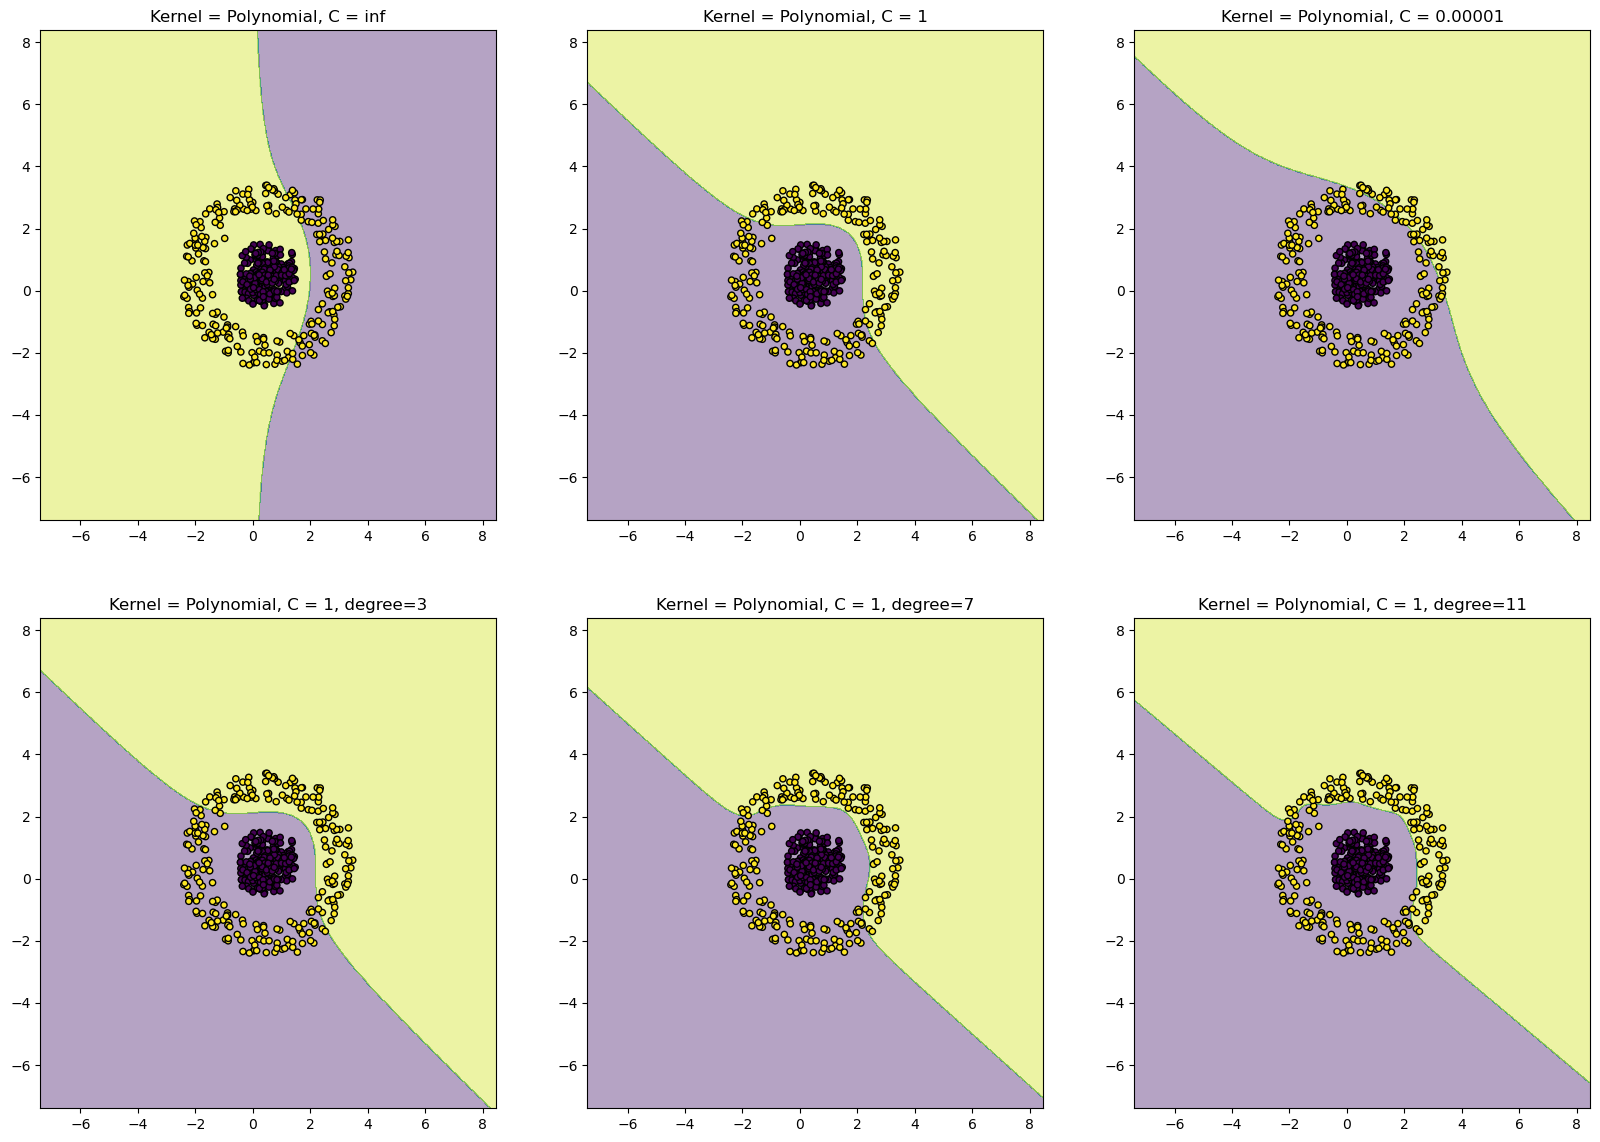

In [12]:
fig = plt.figure(figsize=[20, 14])

svm = SVC(C=inf, kernel='poly', max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 1)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = Polynomial, C = inf', padding=5)

svm = SVC(C=1, kernel='poly', max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 2)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = Polynomial, C = 1', padding=5)

svm = SVC(C=0.00001, kernel='poly', max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 3)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = Polynomial, C = 0.00001', padding=5)

svm = SVC(C=1, kernel='poly', degree=3, max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 4)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = Polynomial, C = 1, degree=3', padding=5)

svm = SVC(C=1, kernel='poly', degree=7, max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 5)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = Polynomial, C = 1, degree=7', padding=5)

svm = SVC(C=1, kernel='poly', degree=11, max_iter=1000000)
svm.fit(X_3, Y_3)
ax = fig.add_subplot(2, 3, 6)
plot_decision_boundary(svm, ax, X_3, Y_3, 'Kernel = Polynomial, C = 1, degree=11', padding=5)

It's fair to say this is not that great in terms of learning a boundary. Ultimatley, we can't learn a circle, and so all of our boundaries are pretty poor in this case. 

## K-Nearest Neighbours Classifier

Our main parameter with KNN is the number of neighbours. To classify a given point, KNN does the following:
* finds the $K$ points that are nearest the one to be classified
* determine the most common class among those points

Larger values of $K$ effectivley mean that the model looks at a wider area to perform the classification. 

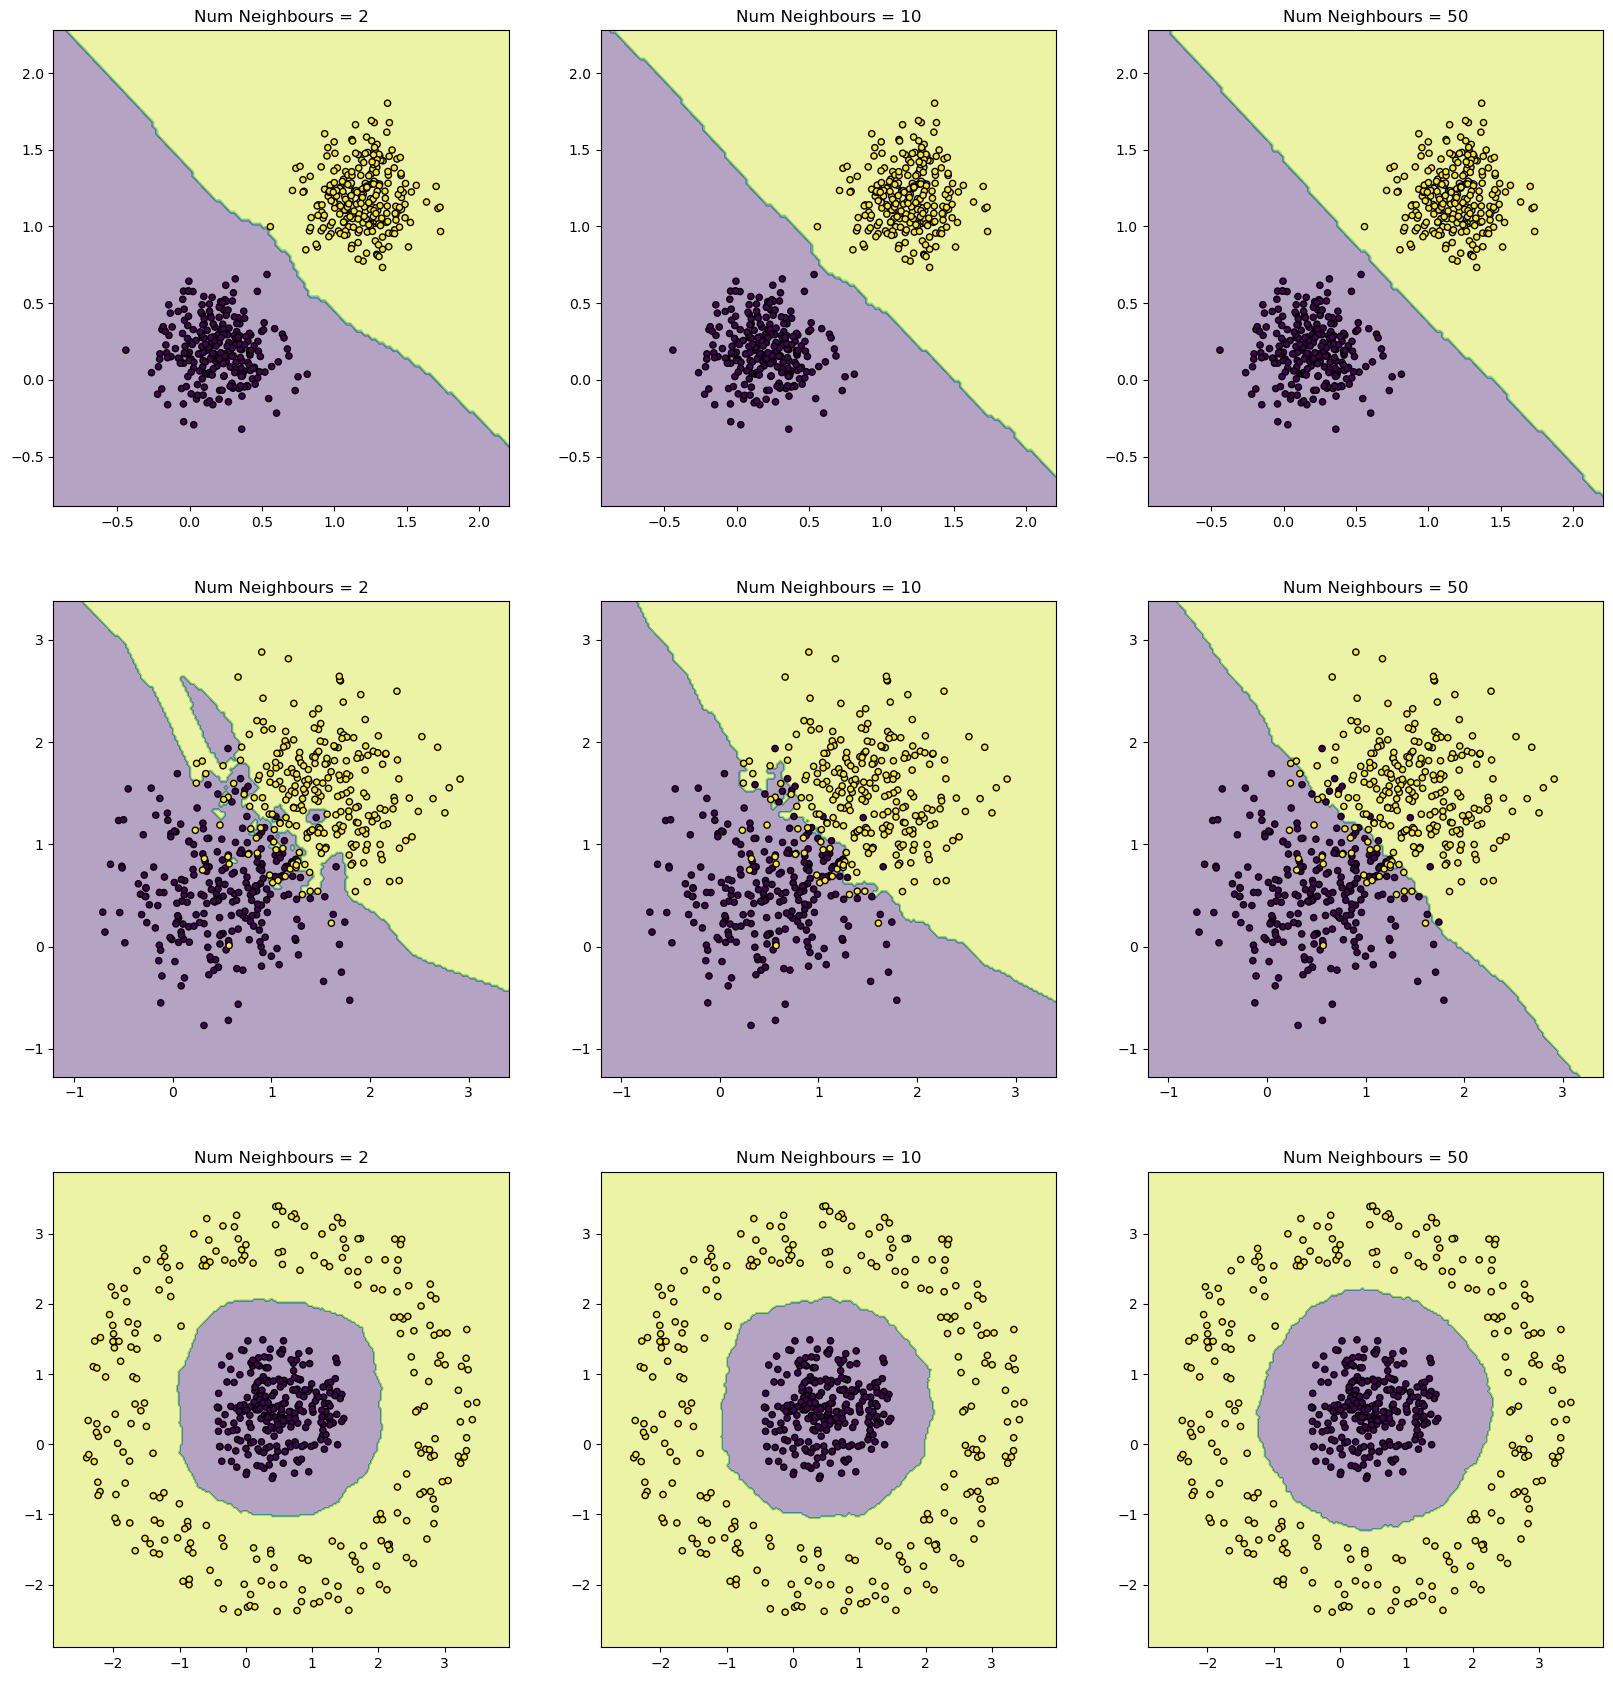

In [13]:
fig = plt.figure(figsize=[20, 21])

cknn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
cknn.fit(X_1, Y_1)
ax = fig.add_subplot(3, 3, 1)
plot_decision_boundary(cknn, ax, X_1, Y_1, 'Num Neighbours = 2')

cknn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
cknn.fit(X_1, Y_1)
ax = fig.add_subplot(3, 3, 2)
plot_decision_boundary(cknn, ax, X_1, Y_1, 'Num Neighbours = 10')

cknn = KNeighborsClassifier(n_neighbors=50, weights='uniform')
cknn.fit(X_1, Y_1)
ax = fig.add_subplot(3, 3, 3)
plot_decision_boundary(cknn, ax, X_1, Y_1, 'Num Neighbours = 50')

cknn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
cknn.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 4)
plot_decision_boundary(cknn, ax, X_2, Y_2, 'Num Neighbours = 2')

cknn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
cknn.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 5)
plot_decision_boundary(cknn, ax, X_2, Y_2, 'Num Neighbours = 10')

cknn = KNeighborsClassifier(n_neighbors=50, weights='uniform')
cknn.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 6)
plot_decision_boundary(cknn, ax, X_2, Y_2, 'Num Neighbours = 50')

cknn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
cknn.fit(X_3, Y_3)
ax = fig.add_subplot(3, 3, 7)
plot_decision_boundary(cknn, ax, X_3, Y_3, 'Num Neighbours = 2')

cknn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
cknn.fit(X_3, Y_3)
ax = fig.add_subplot(3, 3, 8)
plot_decision_boundary(cknn, ax, X_3, Y_3, 'Num Neighbours = 10')

cknn = KNeighborsClassifier(n_neighbors=50, weights='uniform')
cknn.fit(X_3, Y_3)
ax = fig.add_subplot(3, 3, 9)
plot_decision_boundary(cknn, ax, X_3, Y_3, 'Num Neighbours = 50')

From the above, we can see that for smaller $K$ the boundary is contains more fine details. This can be good and bad, in that it means we can model a boundary more accurately, but may also be more sensitive to noise (and thus overfit).

In all cases, we can learn a pretty good boundary, and we can capture very non-linear shapes too.

There are two other parameters that we can also tune for a KNN classifier. These are:
* the distance metric that is used to determine how far apart two points are (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) for a list of those available in sklearn - and note that you can also define your own)
* the weighting that we use when classifying a point

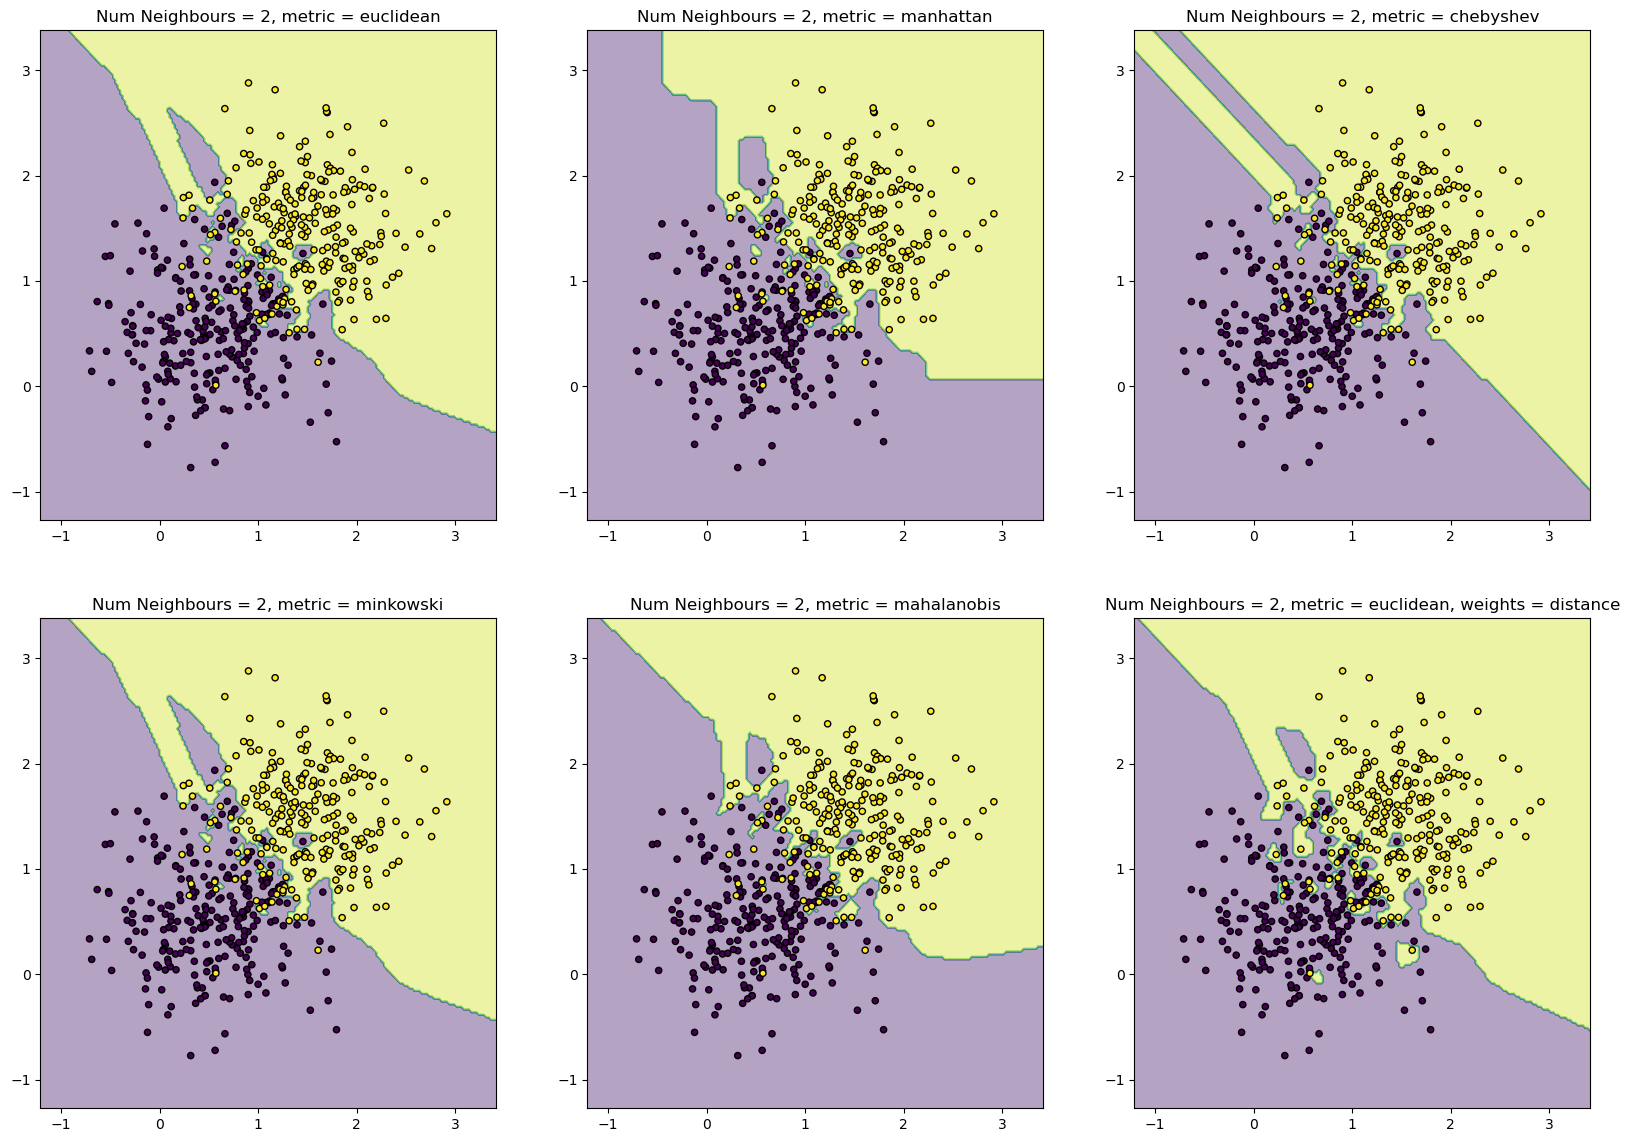

In [14]:
fig = plt.figure(figsize=[20, 14])

cknn = KNeighborsClassifier(n_neighbors=2, weights='uniform', metric='euclidean')
cknn.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 1)
plot_decision_boundary(cknn, ax, X_2, Y_2, 'Num Neighbours = 2, metric = euclidean')

cknn = KNeighborsClassifier(n_neighbors=2, weights='uniform', metric='manhattan')
cknn.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 2)
plot_decision_boundary(cknn, ax, X_2, Y_2, 'Num Neighbours = 2, metric = manhattan')

cknn = KNeighborsClassifier(n_neighbors=2, weights='uniform', metric='chebyshev')
cknn.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 3)
plot_decision_boundary(cknn, ax, X_2, Y_2, 'Num Neighbours = 2, metric = chebyshev')

cknn = KNeighborsClassifier(n_neighbors=2, weights='uniform', metric='minkowski')
cknn.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 4)
plot_decision_boundary(cknn, ax, X_2, Y_2, 'Num Neighbours = 2, metric = minkowski')

cknn = KNeighborsClassifier(n_neighbors=2, weights='uniform', metric='mahalanobis', metric_params={'V': numpy.cov(X_2.transpose())})
cknn.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 5)
plot_decision_boundary(cknn, ax, X_2, Y_2, 'Num Neighbours = 2, metric = mahalanobis')

cknn = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='euclidean')
cknn.fit(X_2, Y_2)
ax = fig.add_subplot(2, 3, 6)
plot_decision_boundary(cknn, ax, X_2, Y_2, 'Num Neighbours = 2, metric = euclidean, weights = distance')

On this data we don't see a huge amount of variation depending on the distance metric, though the fine details in the boundary do change.

With respect to the weights, again we don't see a big difference here, but this can have a very large difference in performance. The default option (uniform) treats all points as equal, i.e. if the number of neighbours is set to 5, only one point is close to the point being classified and the other four are a long way away, it doesn't matter and all points are considered equally. If we weight the points using the distance option, then this proximity is considered, such that points that are closer are given a higher weight.

## Random Forests

Our final classifier is a random forest. This is in fact an ensemble classifier, and trains a large number of simple decision trees, each on random cuts of the data, and each with a different subset of features. The aim is to create a set of uncorrelated classifiers, each of which with some predictive power (i.e. better than a random guess). The combination of these will then be better than any individual tree on it's own (the wisdom of the crowd). To classify a new point, the average result across all trees in the forest is taken.

This process typically makes the models more robust in the presence of noise, and less likely to overfit. We have two main parameters that we can control with our random forest:
* the number of trees
* the depth of each tree

There a number of other parameters we can also consider, but we'll look at those two for now. One key thing to note is the use of the word random. This does mean that you will get variation in performance. Which we'll see below.

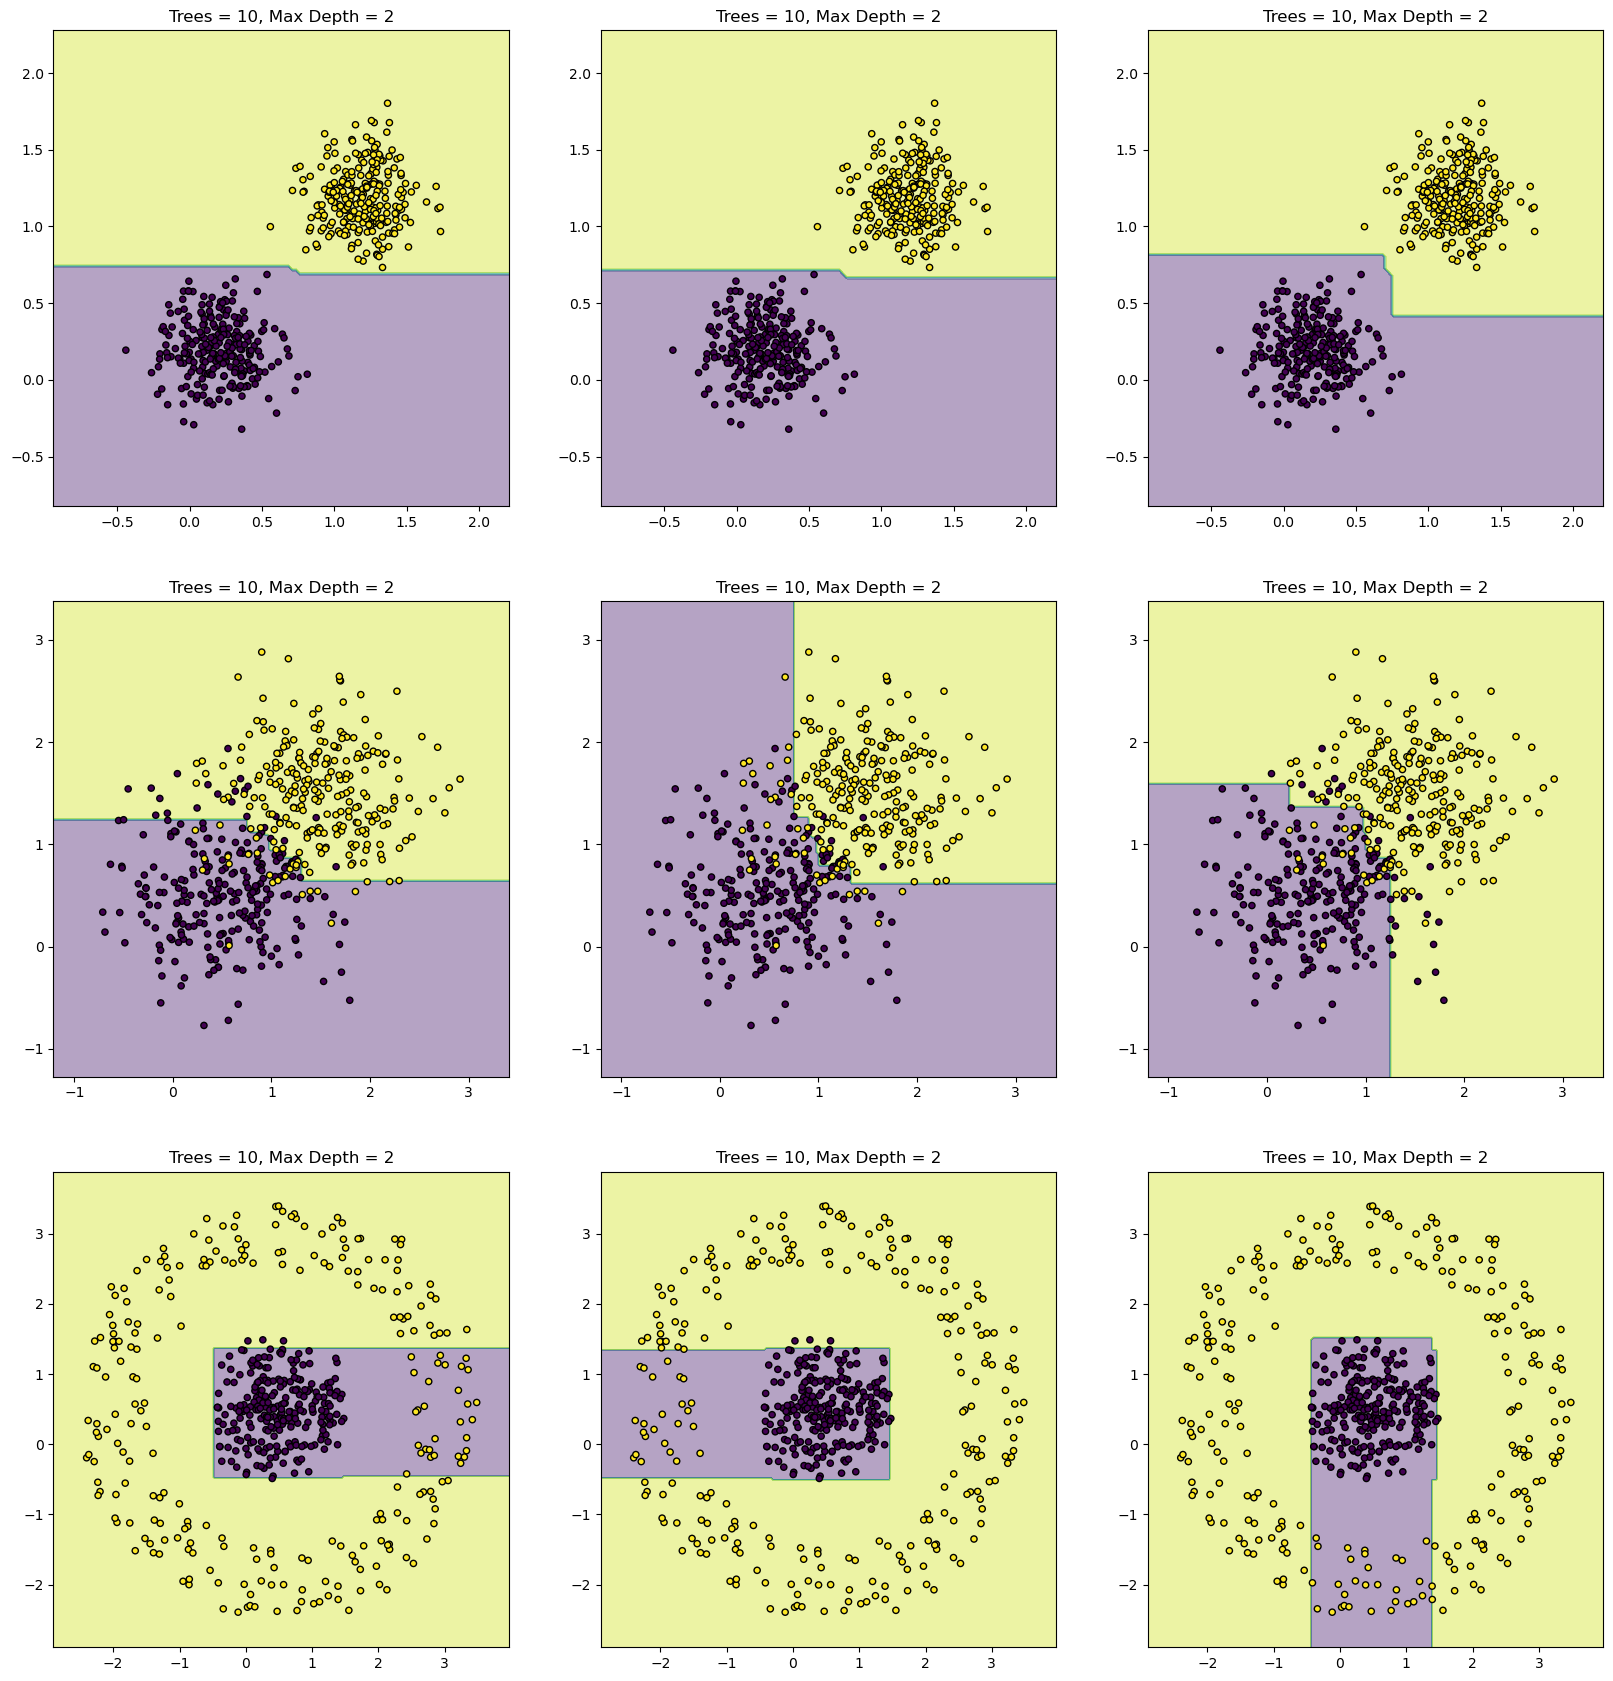

In [15]:
fig = plt.figure(figsize=[20, 21])

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
rf.fit(X_1, Y_1)
ax = fig.add_subplot(3, 3, 1)
plot_decision_boundary(rf, ax, X_1, Y_1, 'Trees = 10, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=4)
rf.fit(X_1, Y_1)
ax = fig.add_subplot(3, 3, 2)
plot_decision_boundary(rf, ax, X_1, Y_1, 'Trees = 10, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rf.fit(X_1, Y_1)
ax = fig.add_subplot(3, 3, 3)
plot_decision_boundary(rf, ax, X_1, Y_1, 'Trees = 10, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 4)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 10, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=4)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 5)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 10, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 6)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 10, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
rf.fit(X_3, Y_3)
ax = fig.add_subplot(3, 3, 7)
plot_decision_boundary(rf, ax, X_3, Y_3, 'Trees = 10, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=4)
rf.fit(X_3, Y_3)
ax = fig.add_subplot(3, 3, 8)
plot_decision_boundary(rf, ax, X_3, Y_3, 'Trees = 10, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rf.fit(X_3, Y_3)
ax = fig.add_subplot(3, 3, 9)
plot_decision_boundary(rf, ax, X_3, Y_3, 'Trees = 10, Max Depth = 2')

In each row we have three models, all with the same parameters, but different random seeds. The end result is a different decision boundary in each case. Sometimes the change is small, sometimes it's not.

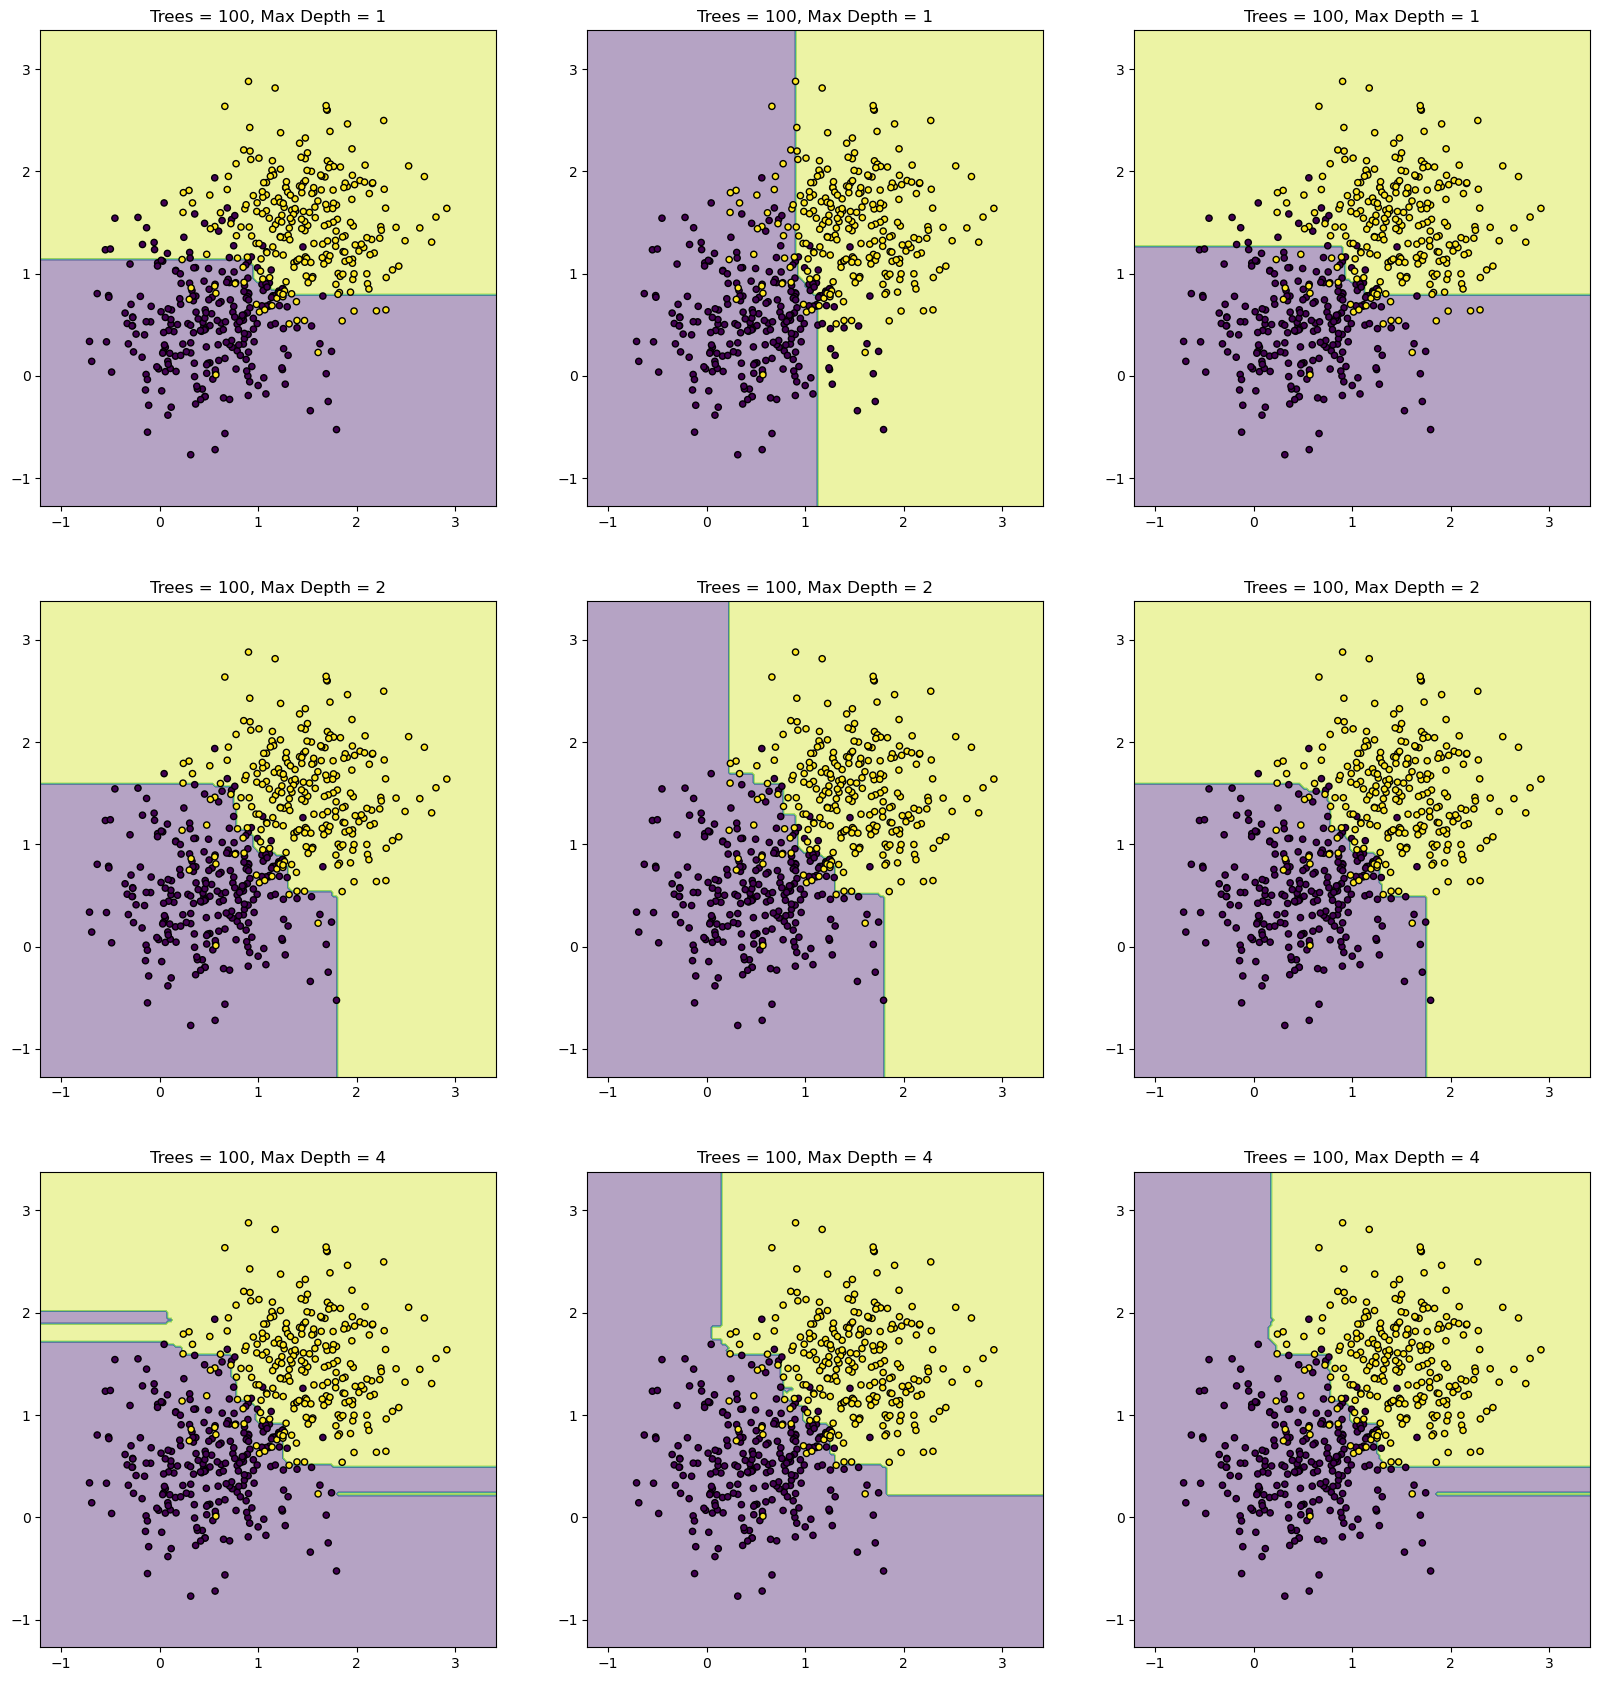

In [16]:
fig = plt.figure(figsize=[20, 21])

rf = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 1)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 100, Max Depth = 1')

rf = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=4)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 2)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 100, Max Depth = 1')

rf = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=42)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 3)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 100, Max Depth = 1')

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 4)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 100, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=4)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 5)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 100, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 6)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 100, Max Depth = 2')

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 7)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 100, Max Depth = 4')

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=4)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 8)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 100, Max Depth = 4')

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(3, 3, 9)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 100, Max Depth = 4')

Above we vary the depth of the threes while keeping the number of trees the same. What we see is that with deeper trees, we get more complex boundaries. Ultimatley, we will get limited benefit of increasing depth further here as we only have 2D data - but for higher dimensional data a greater depth may make more sense (though this is somewhat data dependant). Again in all cases, we see variation caused by the random seed.

As we increase the number of trees, that varition will start to reduce.

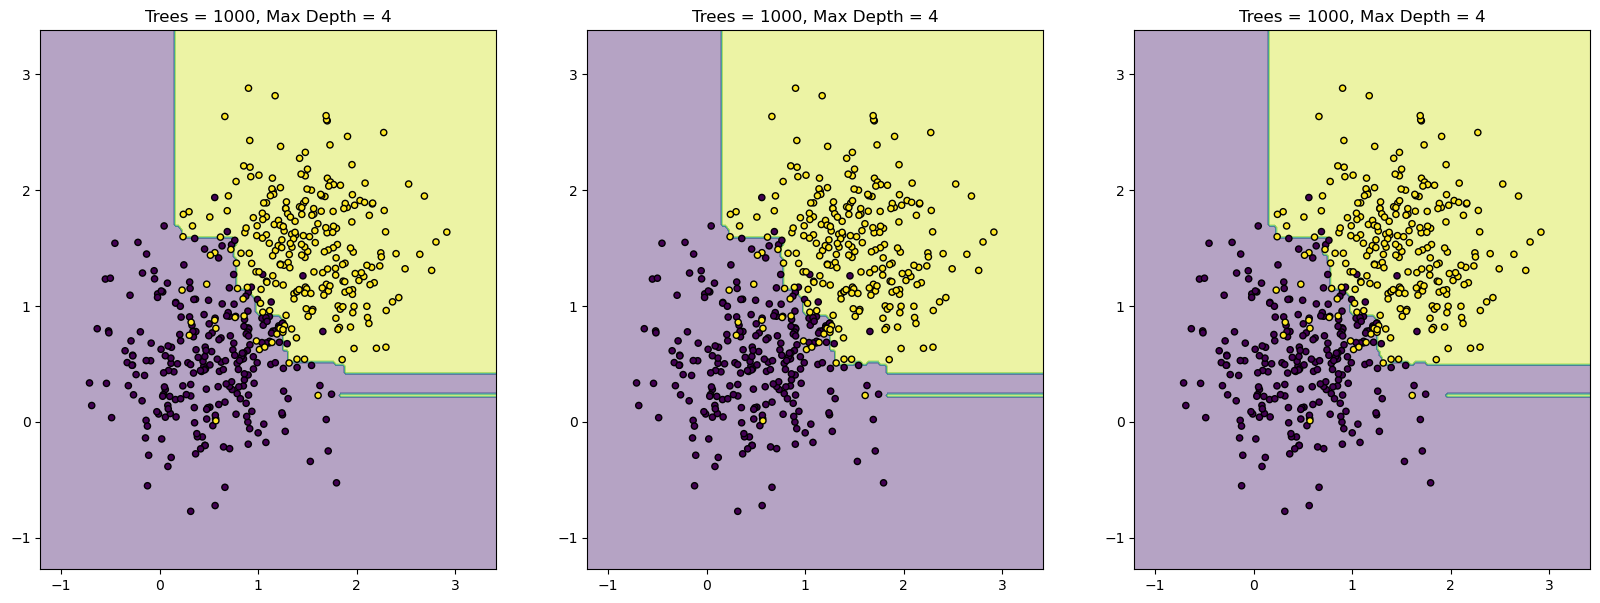

In [17]:
fig = plt.figure(figsize=[20, 7])

rf = RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=0)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(1, 3, 1)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 1000, Max Depth = 4')

rf = RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=4)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(1, 3, 2)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 1000, Max Depth = 4')

rf = RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=42)
rf.fit(X_2, Y_2)
ax = fig.add_subplot(1, 3, 3)
plot_decision_boundary(rf, ax, X_2, Y_2, 'Trees = 1000, Max Depth = 4')

Does this mean that we should aim to train as many trees as possible? No. If we consider the variation that we're seeing, it's either:
* at the absolute boundary of the classes, with points that are clearly in the middle shifting sides
* at regions where there are no or few data points, so effectively in regions where the model needs to extrapolate anyway

In the first case, there's not necessarily one 'best' option in terms of which side of line a boundary point should go. In the case of the second, hypothesising about the boundary should look like in areas where there is no data is a dangerous thing to do.